In [38]:
import glob, cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [39]:
# Get points
obj_points = np.load('../data/calib_results/proj_obj_pts.npy')
cam_points = np.load('../data/calib_results/cam_circle_pts.npy')
proj_points = np.load('../data/calib_results/proj_circle_pts.npy')

In [40]:
def plot_for_image(points, im_id):
    x = points[im_id, :, :, 0]
    y = points[im_id, :, :, 1]

    fig, ax = plt.subplots()
    ax.plot(x, y, ls="", marker="o")
    for i, xi in enumerate(x):
        yi = y[i]
        ax.annotate(str(i), xy=(xi, yi))

    ax.invert_yaxis()
    plt.show()

In [41]:
len(obj_points)

19

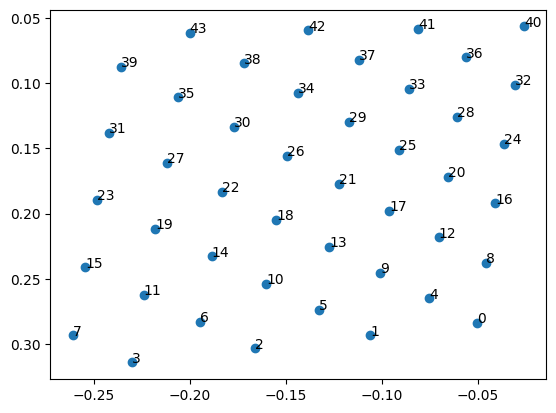

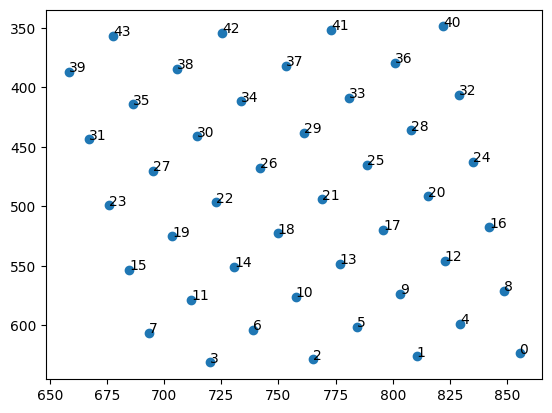

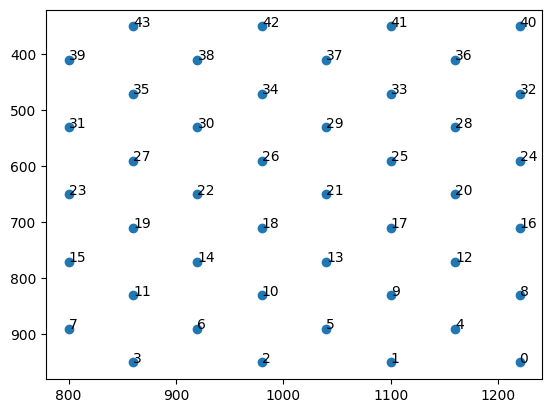

In [42]:
im_id = 11

plot_for_image(obj_points, im_id)
plot_for_image(cam_points, im_id)
plot_for_image(proj_points, im_id)

In [43]:
proj_mtx =  np.load('../data/proj_mtx.npy', )
proj_dist = np.load('../data/proj_dist.npy', )
cam_mtx =   np.load('../data/mtx.npy', )
cam_dist =  np.load('../data/dist.npy')

In [46]:
print(cam_points[0, 0])

[[850.25024 624.852  ]]


In [49]:
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(cam_mtx, cam_dist, (1920,1080), 1, (1920,1080))
undist = cv2.undistortPoints(cam_points.reshape(-1, 1, 2), cam_mtx, cam_dist, None, newcameramtx)
print(undist[0, 0])

[807.8283 626.0324]


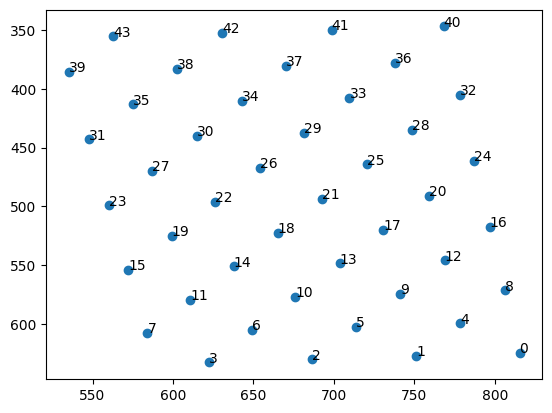

In [51]:
plot_for_image(undist.reshape(cam_points.shape), im_id)